<a id="1.1"></a>
## <b> <span style='color:#F1B12D'>1. Import required libraries and read the data</span></b> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df = pd.read_csv('Apps_data.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<a id="1.1"></a>
## <b> <span style='color:#F1B12D'>2. Data cleansing and Exploratory data analysis</span></b> 

#### 2.1 Check summary statistics of the dataset. List out the columns that need to be worked upon for model building

In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


- The minimum rating for app is 1 and maximum rating is 19 which is unusual because normally the ratings for app are out of 5.

In [6]:
df.describe(include ='O')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


- There are 9660 unique apps but app count is 10841 which indicates presence of duplicates because normally an app's name and its respective information should exist only once.
- Most apps are of category 'Family'.
- Most apps donot have any registered reviews.
- Most apps are free of cost and have price 0.


*Columns that need to be worked upon for model building:-*
- The 'App' column has duplicate values  that have to be treated.
- Most columns are of object type and need to be converted to numeric data type.
- 'Category', 'Type', 'Content Rating' columns require label encoding.
- We can drop columns like 'Last updated', 'Current Ver', 'Android Ver' as they seem to contribute very less to rating prediction.

#### 2.2 Check if there are any duplicate records in the dataset? if any drop them.

In [7]:
df.duplicated().any()

True

In [8]:
df.shape

(10841, 13)

In [9]:
df['App'].value_counts().head(10)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
8 Ball Pool                                           7
slither.io                                            6
Bubble Shooter                                        6
Zombie Catchers                                       6
Bleacher Report: sports news, scores, & highlights    6
Name: App, dtype: int64

- Normally, there should exist a single value count for every app but there are several occurences for many apps so we need to drop the extras.

In [10]:
df1 = df.copy()
df1.drop_duplicates(inplace=True)

In [11]:
df1['App'].value_counts().head(10)

ROBLOX                 9
8 Ball Pool            7
Bubble Shooter         6
Helix Jump             6
Zombie Catchers        6
slither.io             5
Angry Birds Classic    5
Farm Heroes Saga       5
Candy Crush Saga       5
Subway Surfers         5
Name: App, dtype: int64

In [12]:
df1.shape

(10358, 13)

- The number of rows have been reduced from 10841 to 10358, after removing duplicates but the value counts are still not 1.
- We need to treat the 'App' column separately for duplicates. 

In [13]:
df1.drop_duplicates('App',inplace=True)

In [14]:
df1.duplicated().any()

False

In [15]:
df1.shape

(9660, 13)

In [16]:
df1['App'].value_counts().head(10)

Photo Editor & Candy Camera & Grid & ScrapBook    1
CK Pharmacies                                     1
CK Call NEW                                       1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
CK Shop                                           1
FlexBook                                          1
Can Knockdown 3                                   1
Fu*** Weather (Funny Weather)                     1
OB-GYN USMLE Stp2 CK 300 Q & A                    1
Name: App, dtype: int64

#### 2.3 Check the unique categories of the column 'Category', Is there are any invalid category? If yes drop them.

In [17]:
df1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [18]:
df1['Category'].nunique()

34

In [19]:
df2 = df1.copy()

In [20]:
# dropping the invalid entry '1.9'

df2 = df2.drop(df2[df2['Category'] == '1.9'].index)

In [21]:
df2['Category'].nunique()

33

In [22]:
df2['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

#### 2.4 Check if there are missing values present in the column Rating, If any? drop them and Convert ratings to high and low categories(>3.5 is high rest low) and store it in a new column ‘Rating_category’.

In [23]:
missing_values = df2.isna().sum()
percent = (df2.isna().sum()/len(df2))*100
df_ = pd.DataFrame({'missing_values': missing_values, 'percent_missing':percent})
df_

,missing_values,percent_missing
App,0,0.000000
Category,0,0.000000
Rating,1463,15.146495
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000
Type,1,0.010353
Price,0,0.000000
Content Rating,0,0.000000
Genres,0,0.000000


In [24]:
df3 = df2.copy()
df3.dropna(inplace=True)

In [25]:
df3.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [26]:
df3.shape

(8190, 13)

In [27]:
# Define the threshold value
threshold = 3.5

# Define a function to convert ratings
def convert_rating(rating):
    if rating >= threshold:
        return 'High'
    else:
        return 'Low'

# create the 'Rating_category' column
df3['Rating_category'] = df3['Rating'].apply(convert_rating)

# Display the updated DataFrame
df3.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


#### 2.5 Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

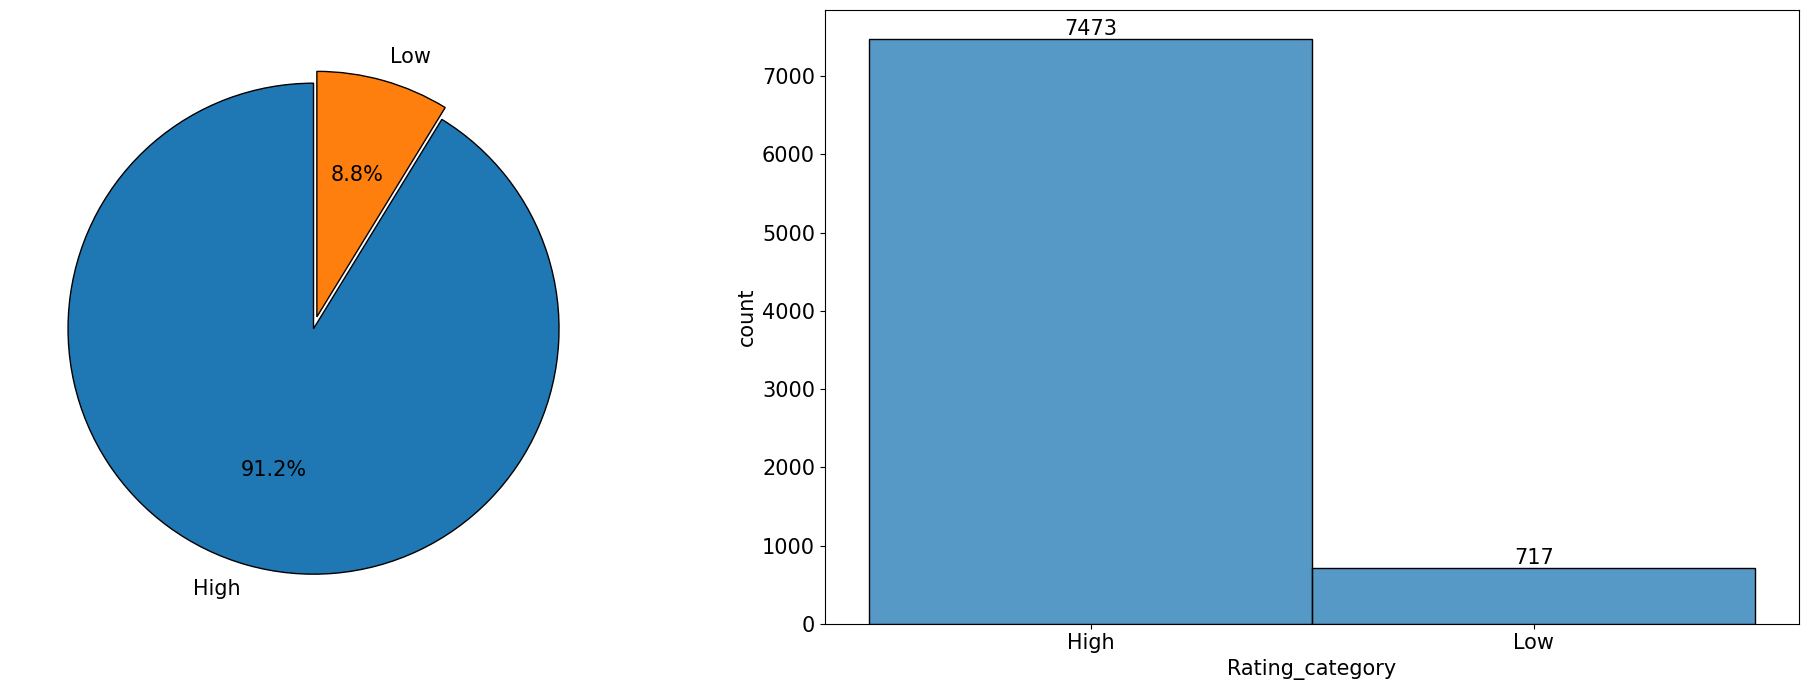

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20,7))
ax1.pie(df3['Rating_category'].value_counts().values, labels = df3['Rating_category'].value_counts().index, startangle= 90, explode = [0.05,0] , autopct='%1.1f%%', textprops ={'fontsize': 15}, wedgeprops={'edgecolor':'black'})

ax =sns.histplot(ax=ax2, data = df3['Rating_category'])
ax.set_xlabel('Rating_category', fontsize=15)
ax.set_ylabel('count', fontsize=15)
for label in ax.containers:
    ax.bar_label(label, fontsize = 15, color = 'black')
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)    
plt.tight_layout()

The target column 'Rating_category' is highly imbalanced.

#### 2.6 Convert the column "Reviews" to numeric datatype and check the presence of outliers in the column and handle the outliers using transformation approach.

In [29]:
df3['Reviews'].dtype

dtype('O')

In [30]:
# converting datatype of Reviews from Object to Numeric
df3['Reviews'] = pd.to_numeric(df3['Reviews'], errors='coerce')

In [31]:
df3['Reviews'].dtype

dtype('int64')

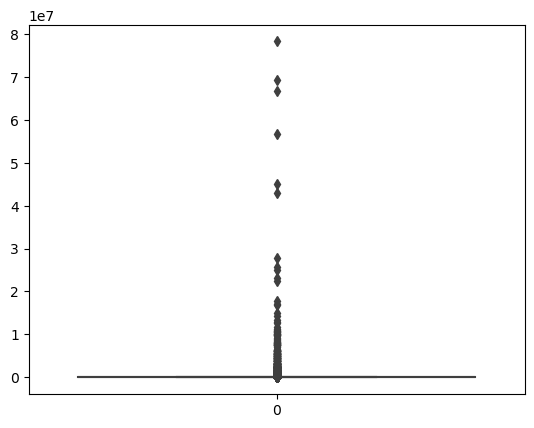

In [32]:
sns.boxplot(df3['Reviews'])
plt.show()

In [33]:
df3['Reviews'].skew()

24.50402456787053

In [34]:
# making two copies of df3 to check the performance of square-root and log transformation on 'Reviews' column

df_l = df3.copy()
df_s = df3.copy()

In [35]:
df_sqrt = pd.DataFrame({'Reviews':np.sqrt(df_s['Reviews'])})

In [36]:
df_sqrt.head()

,Reviews
0,12.609520
1,31.096624
2,295.820892
3,464.374849
4,31.096624


In [37]:
df_log = pd.DataFrame({'Reviews':np.log(df_l['Reviews'])})

In [38]:
df_log.head()

,Reviews
0,5.068904
1,6.874198
2,11.379508
3,12.281384
4,6.874198


In [39]:
df_sqrt['Reviews'].skew()

6.604030741994298

In [40]:
df_log['Reviews'].skew()

-0.04029708512229868

- The log transformation has reduced the skewness better than square-root transformation (closer to zero) so we will use log transformation on Reviews column.

In [41]:
df3['Reviews'] = np.log(df3['Reviews'])

In [42]:
df3.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


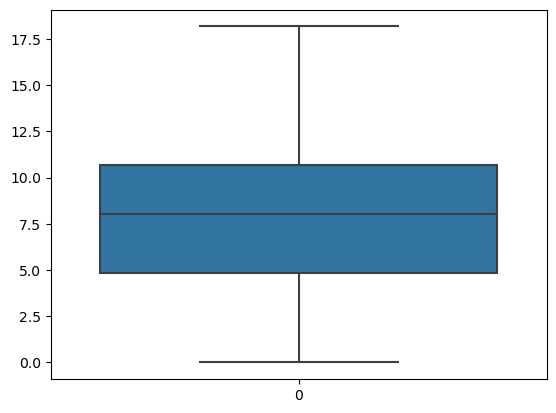

In [43]:
sns.boxplot(df3['Reviews'])
plt.show()

#### 2.7. The column 'Size' contains alphanumeric values, handle the non numeric data and convert the column into suitable datatype.

In [44]:
# number of rows with entry as 'Varies with device'
df3['Size'].value_counts()['Varies with device']

1169

In [45]:
df3['Size'].value_counts()['Varies with device']/len(df3)*100

14.273504273504273

In [46]:
# datatype of feature 'Size' before type conversion
df3['Size'].dtype

dtype('O')

In [47]:
df4 = df3.copy()

In [48]:
# de-selecting entries with 'Varies with device' in the Size column in dataframe df4

df4 = df4[df4['Size'] != 'Varies with device']

In [49]:
df4.shape

(7021, 14)

In [50]:
df4['Size'] = df4['Size'].replace({'k': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval)

In [51]:
df4['Size'] = pd.to_numeric(df4['Size'], errors='coerce')

In [52]:
df4['Size'].dtype

dtype('float64')

In [53]:
df4.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High


#### 2.8. Check the column 'Installs', handle the unwanted characters and convert the column into suitable dataype.

In [54]:
#Cleaning the column 'Installs' from characters like ',' and '+' 

df4['Installs'] = [int(i[:-1].replace(',','')) for i in df4['Installs']]

In [55]:
df4['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [56]:
# Converting to numeric type
df4['Installs'] = pd.to_numeric(df4['Installs'], errors = 'coerce')
df4['Installs'].dtype

dtype('int64')

#### 2.9. Check the column 'Price', remove the unwanted characters and convert the column into suitable datatype.

In [57]:
df4['Price'].dtype

dtype('O')

In [58]:
#Cleaning prices
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = pd.to_numeric(price)
        return price

df4['Price'] = df4['Price'].map(price_clean)

In [59]:
df4['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

In [60]:
df4['Price'].dtype

dtype('float64')

<a id="1.1"></a>
## <b> <span style='color:#F1B12D'>3. Data Preparation for model building </span></b> 

#### 3.1. Drop the columns which you think redundant for the analysis.

- The 'App' column is not needed beacuse app name might not affect the rating much.
- Similarly, Last Updated, Current Ver and Android Ver are features that have very less to do with the rating of an app.
- We will also drop the 'Rating' column as we have created a separate column Rating_category from it.

In [61]:
df5 = df4.copy()

In [62]:
df5 = df5.drop(['App','Rating','Genres','Last Updated', 'Current Ver','Android Ver' ], axis = 1)

In [63]:
df5.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,11.379508,8700000.0,5000000,Free,0.0,Everyone,High
3,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0.0,Teen,High
4,ART_AND_DESIGN,6.874198,2800000.0,100000,Free,0.0,Everyone,High


In [64]:
df5.shape

(7021, 8)

#### 3.2. For the target column 'Rating_category' Replace 'high' as 1 and 'low' as 0.

In [65]:
df5['Rating_category'] = df5['Rating_category'].replace({'High':1,'Low':0})

In [66]:
df5.sample(3)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
3975,FAMILY,16.123400,94000000.0,100000000,Free,0.0,Everyone,1
4442,SOCIAL,6.716595,5100000.0,500000,Free,0.0,Teen,1
2322,MEDICAL,10.050182,26000000.0,1000000,Free,0.0,Everyone,1


#### 3.3. Encode the categorical columns.

In [67]:
df5.select_dtypes(include=['object']).columns

Index(['Category', 'Type', 'Content Rating'], dtype='object')

In [68]:
le = LabelEncoder()
def categorical_to_numeric(df):
    list_cols = list(df.select_dtypes(include=['object']).columns)
    for col in list_cols:
        df[col] = le.fit_transform(list(df[col]))

In [69]:
categorical_to_numeric(df5)

In [70]:
df5.sample(5) 

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
8596,11,0.000000,3800000.0,10,0,0.0,1,1
5650,11,9.118883,5800000.0,1000000,0,0.0,1,0
4792,11,10.558855,17000000.0,1000000,0,0.0,4,1
10241,28,8.561975,20000000.0,500000,0,0.0,1,1
10057,23,9.813563,6000000.0,1000000,0,0.0,1,1


#### 3.4. Segregate the target and independent features.

In [71]:
X = df5.drop('Rating_category',axis=1)
y = df5['Rating_category']

#### 3.5. Split the dataset into train and test.

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [73]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(4914, 7) (2107, 7)
(4914,) (2107,)


In [74]:
X_train.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
2842,24,8.391630,4500000.0,1000000,0,0.00,1
6534,14,6.242223,5900000.0,5000,1,6.99,4
3341,29,12.968235,4700000.0,10000000,0,0.00,1
7534,15,1.098612,40000000.0,50,0,0.00,1
2817,24,9.244645,11000000.0,1000000,0,0.00,1


In [75]:
X_test.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
6285,27,11.062960,11000000.0,1000000,0,0.0,3
4305,14,7.762596,62000000.0,100000,0,0.0,1
4837,14,9.342070,96000000.0,1000000,0,0.0,4
6062,24,6.327937,1700000.0,10000,0,0.0,1
6044,6,1.945910,308000.0,5000,0,0.0,1


#### 3.6. Standardize the data, so that the values are within a particular range. 

In [76]:
# since we have very different ranges for the features, we will use min-max scalar

mm = MinMaxScaler()

X_train.iloc[:,:] = mm.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = mm.transform(X_test.iloc[:,:])

In [77]:
X_train.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
2842,0.75000,0.476262,0.044919,1.999998e-03,0.0,0.000000,0.2
6534,0.43750,0.354274,0.058920,9.998000e-06,1.0,0.017475,0.8
3341,0.90625,0.736005,0.046919,2.000000e-02,0.0,0.000000,0.2
7534,0.46875,0.062351,0.399949,9.800000e-08,0.0,0.000000,0.2
2817,0.75000,0.524675,0.109924,1.999998e-03,0.0,0.000000,0.2


In [78]:
X_test.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
6285,0.84375,0.627872,0.109924,0.00200,0.0,0.0,0.6
4305,0.43750,0.440562,0.619968,0.00020,0.0,0.0,0.2
4837,0.43750,0.530204,0.959997,0.00200,0.0,0.0,0.8
6062,0.75000,0.359139,0.016916,0.00002,0.0,0.0,0.2
6044,0.18750,0.110439,0.002995,0.00001,0.0,0.0,0.2


<a id="1.1"></a>
## <b> <span style='color:#F1B12D'>4. Model training and testing </span></b> 

#### 4.1. Write a function to fit and print the model predictions, input parameters would be model, train, and test data

In [79]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  
    
    model.fit(X_train, y_train)  

    pred = model.predict(X_test)  
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print('\033[1;46;13m Train accuracy: \033[0;0m',train_score)
    print('\033[1;46;13m Test accuracy: \033[0;0m',test_score)
    print('\n')
    print('\033[1;46;13m Confusion matrix: \033[0;0m','\n',confusion_matrix(y_test, pred))
    print('\n')
    print('\033[1;46;13m Classification report: \033[0;0m','\n',classification_report(y_test, pred))

#### 4.2. Use the above function and train a Decision tree, Random Forest, Bagging, Boosting, and Stacked Classifier models and make predictions on test data and evaluate the models. 

#### DECISION TREES

In [80]:
## instantiate 
dt = DecisionTreeClassifier()

## call the function
fit_n_print(dt, X_train, X_test, y_train, y_test)

 Train accuracy:  0.9997964997964998
 Test accuracy:  0.8452776459420978


 Confusion matrix:  
 [[  40  156]
 [ 170 1741]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.19      0.20      0.20       196
           1       0.92      0.91      0.91      1911

    accuracy                           0.85      2107
   macro avg       0.55      0.56      0.56      2107
weighted avg       0.85      0.85      0.85      2107



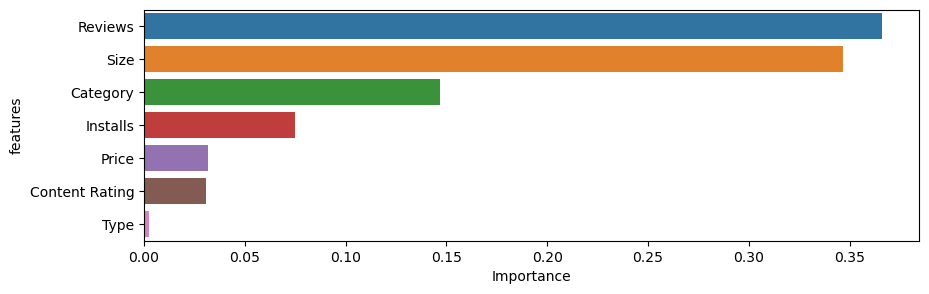

In [81]:
# Checking feature importance

feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': dt.feature_importances_})

feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)


plt.figure(figsize=(10,3))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.show()

### RANDOM FOREST

In [82]:
## instanstiate
rf = RandomForestClassifier()

## call the function
fit_n_print(rf, X_train, X_test, y_train, y_test)

 Train accuracy:  0.9995929995929996
 Test accuracy:  0.8998576174655909


 Confusion matrix:  
 [[   8  188]
 [  23 1888]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.26      0.04      0.07       196
           1       0.91      0.99      0.95      1911

    accuracy                           0.90      2107
   macro avg       0.58      0.51      0.51      2107
weighted avg       0.85      0.90      0.87      2107



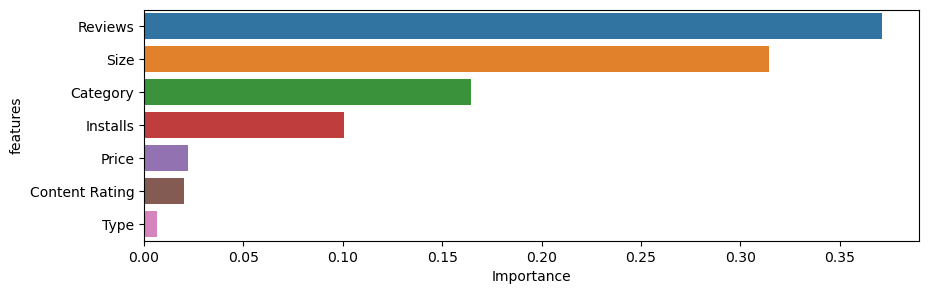

In [83]:
# Checking feature importance

feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': rf.feature_importances_})

feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)


plt.figure(figsize=(10,3))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.show()

### BAGGING CLASSIFIER

In [84]:
## instanstiate
bg = BaggingClassifier()

## call the function
fit_n_print(bg, X_train, X_test, y_train, y_test)

 Train accuracy:  0.9934879934879934
 Test accuracy:  0.8775510204081632


 Confusion matrix:  
 [[  16  180]
 [  78 1833]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.17      0.08      0.11       196
           1       0.91      0.96      0.93      1911

    accuracy                           0.88      2107
   macro avg       0.54      0.52      0.52      2107
weighted avg       0.84      0.88      0.86      2107



### GRADIENT BOOSTING

In [85]:
## instanstiate 
gb = GradientBoostingClassifier()

## call the function
fit_n_print(gb, X_train, X_test, y_train, y_test)

 Train accuracy:  0.9074074074074074
 Test accuracy:  0.9050783103939251


 Confusion matrix:  
 [[   1  195]
 [   5 1906]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.17      0.01      0.01       196
           1       0.91      1.00      0.95      1911

    accuracy                           0.91      2107
   macro avg       0.54      0.50      0.48      2107
weighted avg       0.84      0.91      0.86      2107



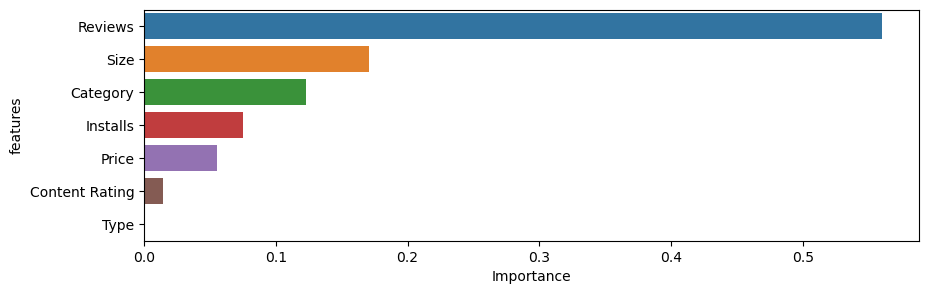

In [86]:
# Checking feature importance

feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': gb.feature_importances_})

feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)


plt.figure(figsize=(10,3))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.show()

### ADA BOOSTING

In [87]:
## instanstiate
ab = AdaBoostClassifier()

## call the function
fit_n_print(ab, X_train, X_test, y_train, y_test)

 Train accuracy:  0.9039479039479039
 Test accuracy:  0.9069767441860465


 Confusion matrix:  
 [[   0  196]
 [   0 1911]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       196
           1       0.91      1.00      0.95      1911

    accuracy                           0.91      2107
   macro avg       0.45      0.50      0.48      2107
weighted avg       0.82      0.91      0.86      2107



### STACKING



In [88]:
## instantiate
estimators = [('dt', dt), ('rf', rf), ('bg', bg), ('gb', gb), ('ab', ab)]
clf = StackingClassifier(estimators = estimators, final_estimator = rf)

## call the function
fit_n_print(clf, X_train, X_test, y_train, y_test)

 Train accuracy:  0.8988603988603988
 Test accuracy:  0.9022306597057428


 Confusion matrix:  
 [[   5  191]
 [  15 1896]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.25      0.03      0.05       196
           1       0.91      0.99      0.95      1911

    accuracy                           0.90      2107
   macro avg       0.58      0.51      0.50      2107
weighted avg       0.85      0.90      0.86      2107



<a id="1.1"></a>
## <b> <span style='color:#F1B12D'>5. Conclusion and improvisation </span></b>

*Conclusion:*

- Decision Tree, Random Forest and Bagging classifier are overfitting as there is large difference between their train and test accuracies.
- Gradient Boosting, Ada Boosting and Stacking have almost same train and test accuracies (approx. 90%) which is an acceptable  result.
- Reviews, Size, Category and Installs are the most important features contributing to the rating prediction.

*Improvisation:*
    
- The target column 'Rating' of the dataset is highly imbalanced (91.2% HIGH, 8.8% LOW) which can hamper with the model predictions. It must be balanced somehow so that the prediction for lower ratings gets improved. 

--------------------------------------------------------------------------------------------------------------------------------